# Analyzing and Making Predictions of Tech Stocks
In this project, used pandas to analyze data that includes value, risk and return metrics of the prominent FAANG companies : Facebook, Apple, Amazon, Netflix, Google. 

Questions addressed in the project: 
- What was the change in stock's price over time?
- What was the moving average of stocks?
- What was the daily return average of a stock?
- What was the correlation between daily returns of different stocks?
- How muc value do we put at a risk by investing in a particular stock?
- How can we attempt to predict future FAANG stock behaviour?


In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime

#Using yfinance to access Yahoo Historical stocks
#pip install yfinance
import yfinance as yf
#yfinance is a free open source library used to access the financial data available on Yahoo Finance.
#Yahoo Finance offers a range of market data on stocks, bonds, currencies and cryptocurrencies.


Comparing the five "FAANG" companies to analyze their average stock prices and returns to ultimately perform a risk assessment of the stocks in the last 365 days. 

In [2]:
stock_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'NFLX']

end = datetime.now() #2021, 3, 5

start = datetime(end.year-1, end.month, end.day)
#Start date set to one year back #(2020, 3, 5, 0, 0)

for stock in stock_list:
    globals()[stock] = yf.download(stock, start, end)
    
#globals returns a dict representing the current global symbol table
#globals()[x] : this way we are assigning a value to the x key in globals dictionary 
#Symnol table is a data structure which contains all the information about the program. This includes variable name, classes, functions


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Listing simple statistics of the stock price of Netflix in the previous year

In [3]:
NFLX.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,545.570007,552.140015,542.000000,550.640015,550.640015,3041400
2021-03-02,553.340027,556.989990,546.020020,547.820007,547.820007,3039100
2021-03-03,545.929993,548.010010,517.809998,520.700012,520.700012,5355500
2021-03-04,521.500000,531.500000,507.679993,511.290009,511.290009,5027100
2021-03-05,511.980011,517.760010,498.790009,516.390015,516.390015,5068700


In [4]:
NFLX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,477.610317,485.928094,469.094288,477.802500,477.802500,6.604551e+06
std,58.846338,58.081408,58.330961,58.094932,58.094932,4.176807e+06
min,302.399994,322.899994,290.250000,298.839996,298.839996,1.144000e+06
25%,439.775009,447.000000,431.547485,438.074989,438.074989,4.122900e+06
50%,489.755005,496.070007,481.925003,488.904999,488.904999,5.473250e+06
75%,518.554993,526.925018,507.267502,520.725006,520.725006,7.785000e+06
max,582.450012,593.289978,570.400024,586.340027,586.340027,3.263750e+07


In [5]:
NFLX.shape

(252, 6)

In [6]:
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-03-06 to 2021-03-05
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


Adj Close: The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any corporate actions. It factors in corporate actions, such as stock splits, dividends, and rights offerings.
Volume

# Change in Stock Price Over Time

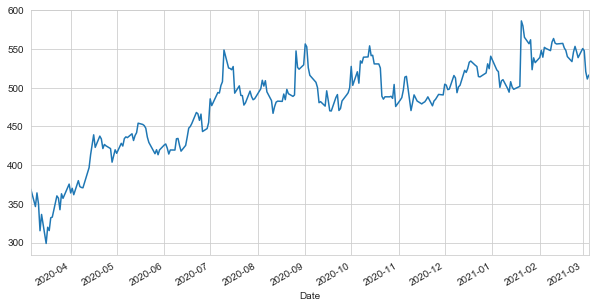

In [7]:
NFLX['Adj Close'].plot(figsize = (10,5))

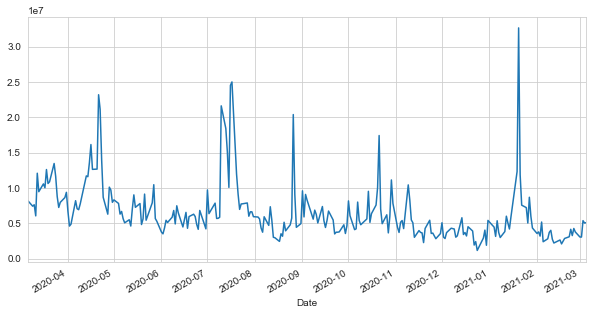

In [8]:
NFLX['Volume'].plot(figsize = (10,5))

After a huge drop in March due to the covid pandemic hit, Netflix stocks have rose and fluctuated around $500 in the last few quarter while its volume, after seeing sudden spikes over the year, has decreased to 50K shares per day. Now, lets calculate moving averages to smooth out variations in the data and obtain a better trend.

# Calculating Moving Averages

In [9]:
averages = [10, 25, 50]

for avg in averages:
    label = "MAvg %s days" %(str(avg))
    NFLX[label] = NFLX['Adj Close'].rolling(window = avg, center = False).mean()
    

#Rolling func
#Adj close is the column on which we are performing the
#mean() function that takes the window size as per avg and
#finds the mean over each window 

In [10]:
NFLX.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg 10 days,MAvg 25 days,MAvg 50 days
Date,,,,,,,,,
2021-03-01,545.570007,552.140015,542.000000,550.640015,550.640015,3041400,546.659003,547.754402,535.651601
2021-03-02,553.340027,556.989990,546.020020,547.820007,547.820007,3039100,545.713000,547.396001,536.111401
2021-03-03,545.929993,548.010010,517.809998,520.700012,520.700012,5355500,542.648999,545.746802,535.867401
2021-03-04,521.500000,531.500000,507.679993,511.290009,511.290009,5027100,538.956003,545.267201,535.404200
2021-03-05,511.980011,517.760010,498.790009,516.390015,516.390015,5068700,536.573007,544.378802,535.153801


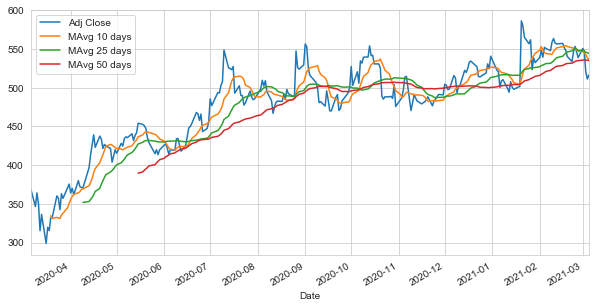

In [11]:
NFLX[['Adj Close', 'MAvg 10 days', 'MAvg 25 days', 'MAvg 50 days']].plot(subplots = False, figsize = (10,5))

The 50-day moving average supports the observation that Netflix's stock has remained consistent at $500 in the last few quarters and grown to 530 in just the last quarter. This plot also reveals the approximate crossover points that tell us when Netflix's stock trend is increasing or decreasing. Now let's calculate the average daily returns for Netflix's stock.

# Daily Return Averages

In [12]:
#Daily return col can be created by using the percentage change over the adjusted closing price
NFLX['Daily Return'] = NFLX['Adj Close'].pct_change()
NFLX.tail()
#pct_change = (Current-Previous/Previous) * 100. First value will be NaN

,Open,High,Low,Close,Adj Close,Volume,MAvg 10 days,MAvg 25 days,MAvg 50 days,Daily Return
Date,,,,,,,,,,
2021-03-01,545.570007,552.140015,542.000000,550.640015,550.640015,3041400,546.659003,547.754402,535.651601,0.021880
2021-03-02,553.340027,556.989990,546.020020,547.820007,547.820007,3039100,545.713000,547.396001,536.111401,-0.005121
2021-03-03,545.929993,548.010010,517.809998,520.700012,520.700012,5355500,542.648999,545.746802,535.867401,-0.049505
2021-03-04,521.500000,531.500000,507.679993,511.290009,511.290009,5027100,538.956003,545.267201,535.404200,-0.018072
2021-03-05,511.980011,517.760010,498.790009,516.390015,516.390015,5068700,536.573007,544.378802,535.153801,0.009975


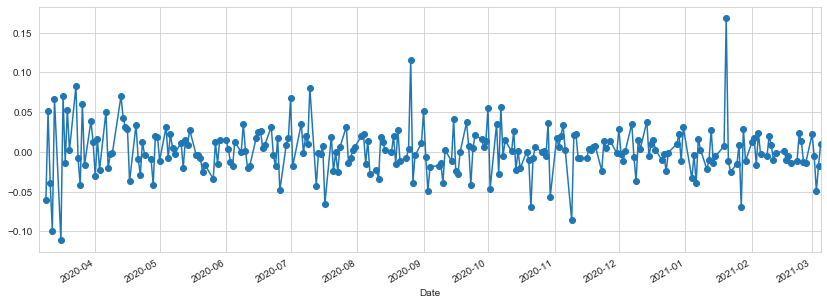

In [13]:
NFLX['Daily Return'].plot(figsize = (14,5), marker = 'o')

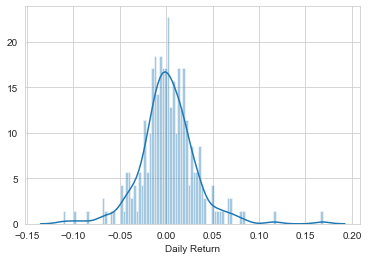

In [14]:
sns.distplot(NFLX['Daily Return'].dropna(), bins = 100)

Using Seaborn to plot axes, we observe that distribution of daily returns is concentrated heavily around 0 with little skew towards positive or negative returns.

# Correlation between Different Daily Stock Returns

Examining the trend between some pairs of the FAANG stocks using Joint plot, using percent change of daily reutrns

In [15]:
Comparison = yf.download(stock_list, start, end)['Adj Close']
pct_compar = Comparison.pct_change()
pct_compar.tail()

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2021-03-01,0.053851,0.017204,0.021921,0.019623,0.021880
2021-03-02,-0.020894,-0.016404,-0.002724,-0.012957,-0.005121
2021-03-03,-0.024457,-0.028932,-0.023668,-0.026981,-0.049505
2021-03-04,-0.015812,-0.009128,0.011043,-0.003647,-0.018072
2021-03-05,0.010738,0.007687,0.029013,0.021479,0.009975


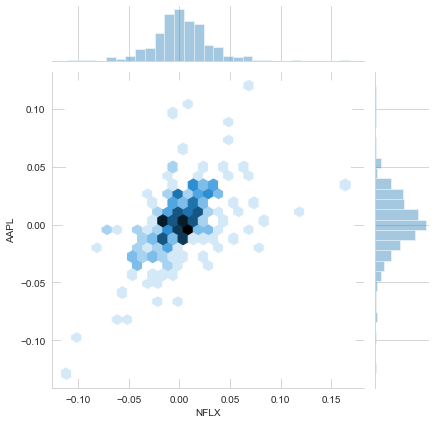

In [16]:
sns.jointplot('NFLX', 'AAPL', pct_compar, kind = 'hex')

There seems to be a moderate correlation between Netflix and Apple returns. Generating all the pairwise plots to see if there are any stronger correlations.

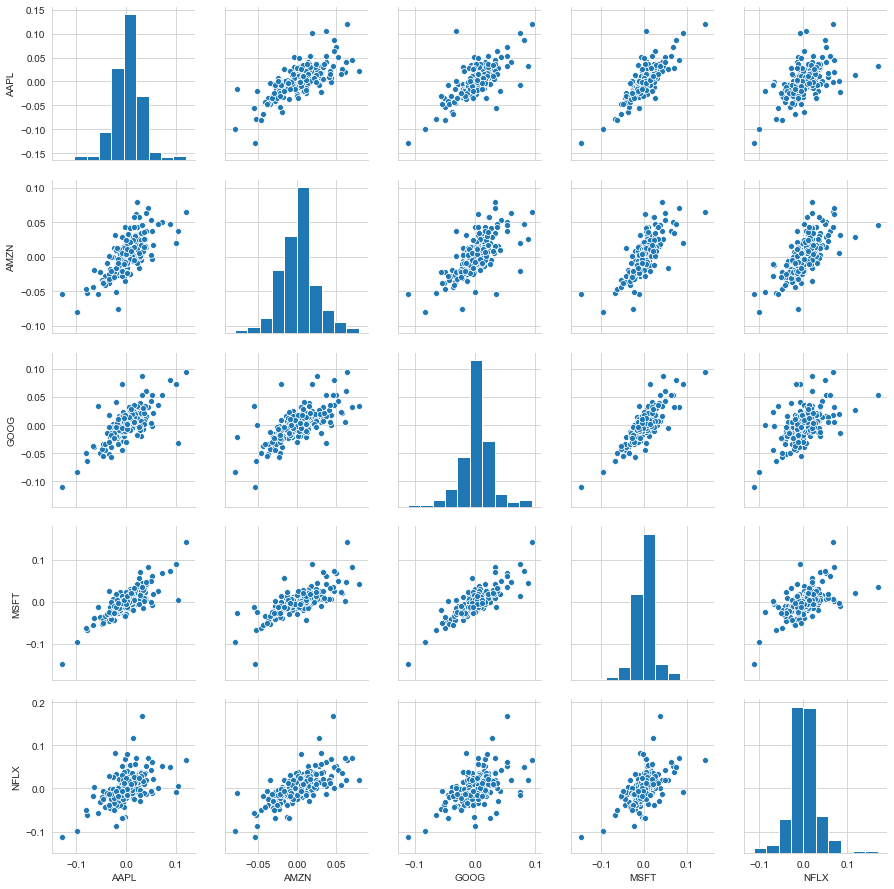

In [17]:
sns.pairplot(pct_compar.dropna())

There seems to be stronger correlations between Apple and Microsoft, Microsoft and Google, though to be sure we need another visualization tool, the correlation matrix plot, which allows us to view the pairwise confidence intervals together.

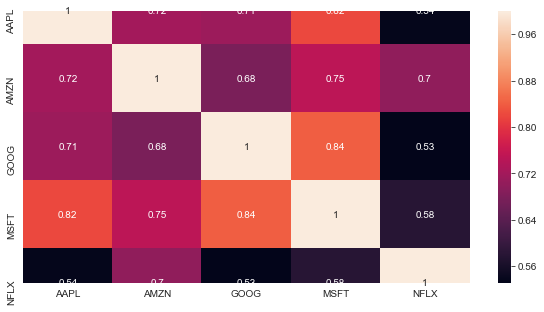

In [23]:
plt.figure(figsize = (10,5))
sns.heatmap(pct_compar.corr(), annot =True)

From the correlation heatmap, it becomes clear that (Microsoft and Apple) and (Microsoft and Google) share a stronger correlation, and in general Microsoft maintains a strongest pairwise aggregate correlations compared to the rest of the 'FAANG' companies. Though perhaps expected, it is noteworthy that all five companies pairwise have moderate to strong positive correlation.

# Determining Value from Risk vs. Expected Return
Now we address the question of risk in buying stocks to compare these five companies.

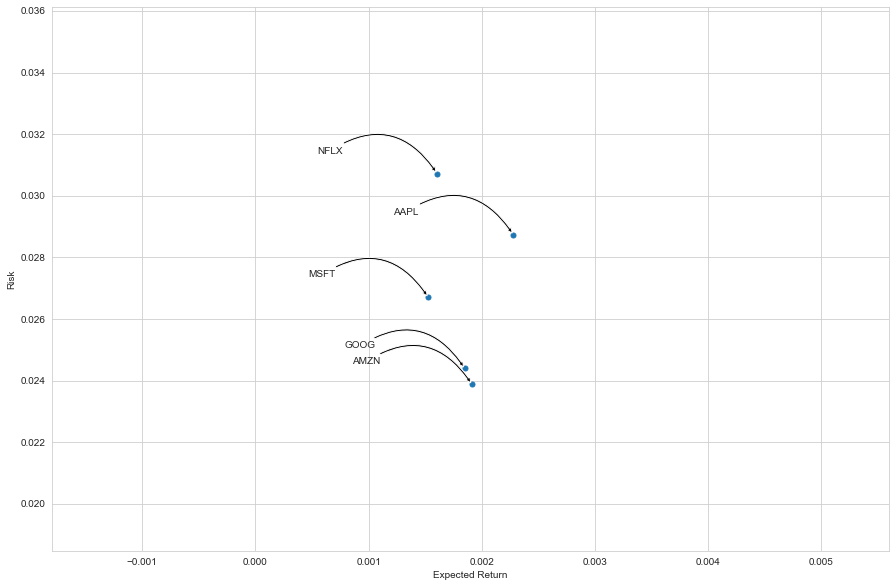

In [94]:
pct_filled = pct_compar.dropna()
plt.figure(figsize = (15,10))

plt.scatter(pct_filled.mean(), pct_filled.std(), s =25)
plt.xlabel("Expected Return")
plt.ylabel("Risk")

for label,x,y in zip(pct_filled.columns,pct_filled.mean(),pct_filled.std()):
    plt.annotate(label,xy=(x,y),xytext=(-120,20),textcoords = 'offset points',
    arrowprops = dict(facecolor='black', arrowstyle='simple', connectionstyle = 'arc3,rad=-0.5'))


From this plot we can see that Amazon and Google have the lowest risk and offer decent expected return-- a sign that they are good stocks to buy at the moment. With lockdown, Amazon saw some great rise in sales for wfh culture. Apple offers the highest expected return but at a certain high risk. For Microsoft and Netflix, Microsft offers a  similar return but at a much lower risk level comparatively. 

Modelling an additional value-at-risk metric in order to assess the value at each risk confidence interval for these 5 companies. Trying these two ways: bootstrapping and using Monte Carlo-GBM, with Google.

In [95]:
pct_compar.head()

,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2020-03-04,NaN,NaN,NaN,NaN,NaN
2020-03-05,-0.032437,-0.026217,-0.048669,-0.025095,-0.028688
2020-03-06,-0.013280,-0.011923,-0.015640,-0.028267,-0.010220
2020-03-09,-0.079092,-0.052854,-0.063809,-0.067772,-0.060926
2020-03-10,0.072022,0.050655,0.053333,0.068384,0.050911


In [96]:
pct_compar['GOOG'].quantile(q=0.05)

-0.039050382803466156

In [97]:
pct_compar['GOOG'].quantile(q=0.01)

-0.0600794641827449

From the empirical quantiles given for both confience intervals, we know that the worst possible loss will not exceed 3.9 percent with 95% confidence and 6 percent with 99% confidence.